# POSTTEST 7
### Mengolah Data Citra

## CNN

Datasets yang digunakan: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/

### Import Library yang digunakan

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Directory Train dan Val

In [19]:
TRAIN_DIR ='Vegetable Images/train'
VAL_DIR ='Vegetable Images/validation'
TEST_DIR ='Vegetable Images/test'

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255,
            validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

## Augmentasi Gambar

#### Train

In [21]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

#### Validation

In [22]:
val_datagen = ImageDataGenerator(
    rescale = 1.0/255.0
)

#### Test

In [23]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255.0
)

## Membuat Flow From Direction
Membuat Generator Untuk Setiap Subset

#### Train

In [24]:
train_generator = train_datagen.flow_from_directory(
   TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 4000 images belonging to 4 classes.


#### Validation

In [25]:
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 800 images belonging to 4 classes.


#### Test

In [26]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 800 images belonging to 4 classes.


## Model Sequential

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    #CNN (Feature Extraction)
    Conv2D(128, 3, 
           activation ='relu', 
           input_shape = [150, 150, 3]),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    #DNN (Fully-Connected)
    Dense(64, activation = 'relu'),
    Dense(4, activation = 'softmax'),
    
])

model.compile(optimizer='Adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

#### Melatih Model

In [28]:
hasil = model.fit(train_generator, validation_data = val_generator, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 259s 2s/step - loss: 0.7373 - accuracy: 0.6490 - val_loss: 0.3994 - val_accuracy: 0.8825
Epoch 2/10
125/125 [==============================] - 232s 2s/step - loss: 0.4525 - accuracy: 0.8138 - val_loss: 0.2626 - val_accuracy: 0.9013
Epoch 3/10
125/125 [==============================] - 231s 2s/step - loss: 0.3095 - accuracy: 0.8788 - val_loss: 0.2228 - val_accuracy: 0.9150
Epoch 4/10
125/125 [==============================] - 233s 2s/step - loss: 0.2316 - accuracy: 0.9137 - val_loss: 0.1160 - val_accuracy: 0.9563
Epoch 5/10
125/125 [==============================] - 232s 2s/step - loss: 0.1914 - accuracy: 0.9295 - val_loss: 0.0997 - val_accuracy: 0.9525
Epoch 6/10
125/125 [==============================] - 232s 2s/step - loss: 0.1624 - accuracy: 0.9392 - val_loss: 0.0697 - val_accuracy: 0.9875
Epoch 7/10
125/125 [==============================] - 232s 2s/step - loss: 0.1141 - accuracy: 0.9617 - val_loss: 0.0565 - val_accuracy: 0.9825

### Evaluasi Model

In [29]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss", loss)
print("Accuracy", accuracy)

25/25 [==============================] - 18s 745ms/step - loss: 0.0850 - accuracy: 0.9688
Loss 0.08497331291437149
Accuracy 0.96875


### Grafik Yang Menunjukkan Pergerakan Matriks Akurasi dan Loss

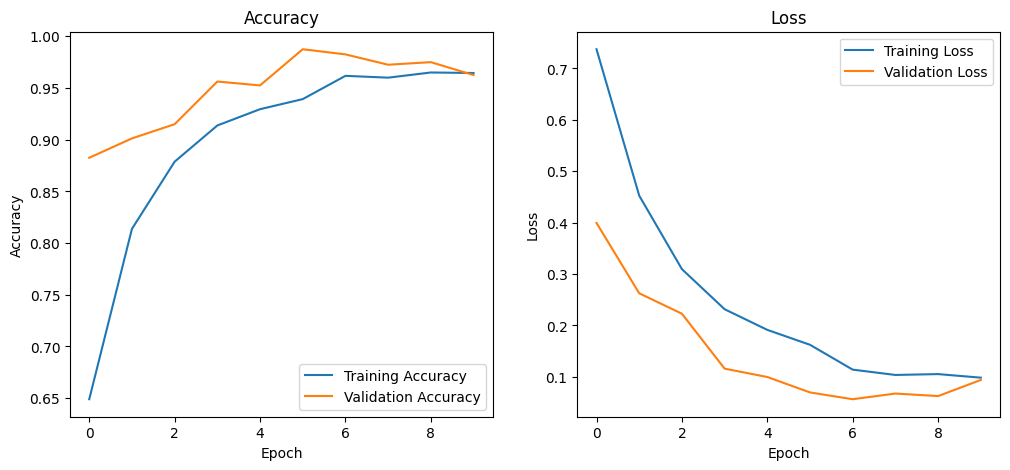

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hasil.history['accuracy'], label='Training Accuracy')
plt.plot(hasil.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hasil.history['loss'], label='Training Loss')
plt.plot(hasil.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()